In [2]:
# Importamos las bibliotecas necesarias
import numpy as np
from scipy.fftpack import dct, idct  # Funciones para DCT e IDCT

# Función que implementa la DCT bidimensional (DCT 2D)
# La DCT se aplica primero por filas, luego por columnas
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Función que implementa la DCT inversa (IDCT 2D)
# Aplica el proceso inverso de la dct2
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Definimos un bloque de imagen 8x8 (valores simulados en escala de grises)
block = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
])

# Aplicamos la DCT al bloque
F = dct2(block)
print("Coeficientes DCT (redondeados a 2 decimales):\n", np.round(F, 2))

# Aplicamos la IDCT para reconstruir el bloque original (aproximado)
reconstructed = idct2(F)
print("\nBloque reconstruido:\n", np.round(reconstructed))



Coeficientes DCT (redondeados a 2 decimales):
 [[ 6.0863e+02 -3.0190e+01 -6.1200e+01  2.7240e+01  5.6120e+01 -2.0100e+01
  -2.3900e+00  4.6000e-01]
 [ 4.4700e+00 -2.1860e+01 -6.0760e+01  1.0250e+01  1.3150e+01 -7.0900e+00
  -8.5400e+00  4.8800e+00]
 [-4.6830e+01  7.3700e+00  7.7130e+01 -2.4560e+01 -2.8910e+01  9.9300e+00
   5.4200e+00 -5.6500e+00]
 [-4.8530e+01  1.2070e+01  3.4100e+01 -1.4760e+01 -1.0240e+01  6.3000e+00
   1.8300e+00  1.9500e+00]
 [ 1.2120e+01 -6.5500e+00 -1.3200e+01 -3.9500e+00 -1.8800e+00  1.7500e+00
  -2.7900e+00  3.1400e+00]
 [-7.7300e+00  2.9100e+00  2.3800e+00 -5.9400e+00 -2.3800e+00  9.4000e-01
   4.3000e+00  1.8500e+00]
 [-1.0300e+00  1.8000e-01  4.2000e-01 -2.4200e+00 -8.8000e-01 -3.0200e+00
   4.1200e+00 -6.6000e-01]
 [-1.7000e-01  1.4000e-01 -1.0700e+00 -4.1900e+00 -1.1700e+00 -1.0000e-01
   5.0000e-01  1.6800e+00]]

Bloque reconstruido:
 [[ 52.  55.  61.  66.  70.  61.  64.  73.]
 [ 63.  59.  55.  90. 109.  85.  69.  72.]
 [ 62.  59.  68. 113. 144. 104.  66

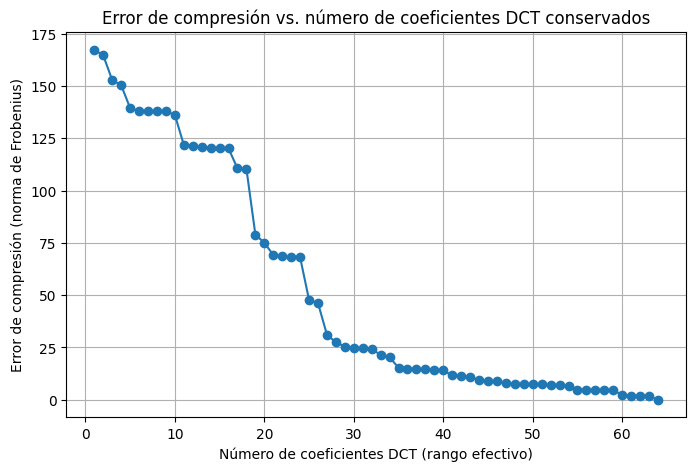

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Función DCT y su inversa (2D)
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Imagen 8x8 (bloque de prueba)
B = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
], dtype=float)

# Aplicamos la DCT
F = dct2(B)

# Simulamos truncamiento de rango
errors = []
ranks = []

# Para cada r, dejamos los primeros r coeficientes (zigzag simulado en forma de renglones)
for r in range(1, 65):  # r = número de coeficientes mantenidos
    F_trunc = np.zeros_like(F)
    count = 0
    for i in range(8):
        for j in range(8):
            if count < r:
                F_trunc[i, j] = F[i, j]
                count += 1

    # Reconstruimos la imagen con IDCT
    B_hat = idct2(F_trunc)

    # Calculamos el error con norma de Frobenius
    error = np.linalg.norm(B - B_hat, 'fro')
    errors.append(error)
    ranks.append(r)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(ranks, errors, marker='o')
plt.title("Error de compresión vs. número de coeficientes DCT conservados")
plt.xlabel("Número de coeficientes DCT (rango efectivo)")
plt.ylabel("Error de compresión (norma de Frobenius)")
plt.grid(True)
plt.show()
